**1.Загрузим нужные библиотеки:**

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats as st
import numpy as np

**2. Просмотр данных по нашим датафреймам:**

In [2]:
query1 = pd.read_csv('/datasets/query_1.csv')
query1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [3]:
query1

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [4]:
query3 = pd.read_csv('/datasets/query_3.csv')
query3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [5]:
query3.head(10)

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
5,Барнаул,2.612903
6,Белгород,6.000000
7,Белоярский,2.000000
8,Благовещенск,1.000000
9,Братск,1.000000


Изменим тип данных для **average_flights** на int

In [6]:
query3.describe().T #посмотрим какой вид int применить

,count,mean,std,min,25%,50%,75%,max
average_flights,101.0,5.494189,13.11979,1.0,2.0,3.0,5.870968,129.774194


In [7]:
query3['average_flights'] = query3['average_flights'].astype('int16')
query3.info() #проверим

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null int16
dtypes: int16(1), object(1)
memory usage: 1.1+ KB


In [8]:
query_last = pd.read_csv('/datasets/query_last.csv')
query_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


**2.1 Топ 10 городов по полётам:**

In [9]:
top10=query3.sort_values(by='average_flights', ascending=False).head(10)
top10

,city,average_flights
43,Москва,129
70,Санкт-Петербург,31
54,Новосибирск,17
20,Екатеринбург,11
33,Красноярск,11
63,Пермь,10
67,Ростов-на-Дону,10
10,Брянск,10
84,Ульяновск,9
73,Советский,9


**3. Зависимость количества рейсов от типа самолета:**

In [10]:
bar1 = query1.sort_values(by='flights_amount')

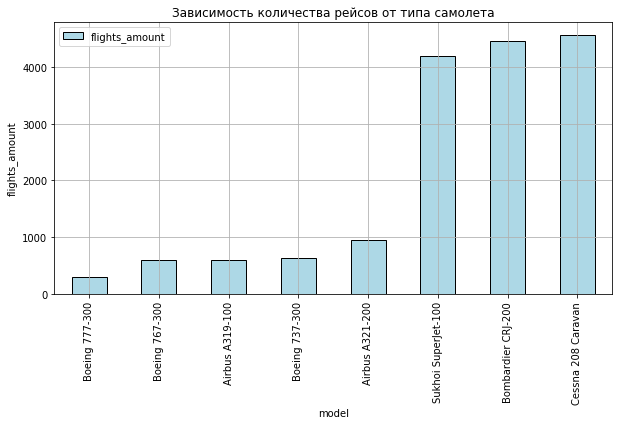

In [11]:
fig, ax = plt.subplots()
ax.set_ylabel('flights_amount')
ax.set_title('Зависимость количества рейсов от типа самолета')
bar1.plot(kind = 'bar', x = 'model', y = 'flights_amount', figsize = (10,5), ec='black', color = 'lightblue', grid='true',ax=ax);

Лидеры по количеству вылетов - маленькие самолеты. Расстояния короткие - вылетов много. Из графика видно, что наименьшее число вылетов у Boeing-777-300 - крупного лайнера на 340 человек.

**4. Количество рейсов в зависимости от города:**

In [12]:
bar2 = query3.sort_values(by='average_flights', ascending=False)

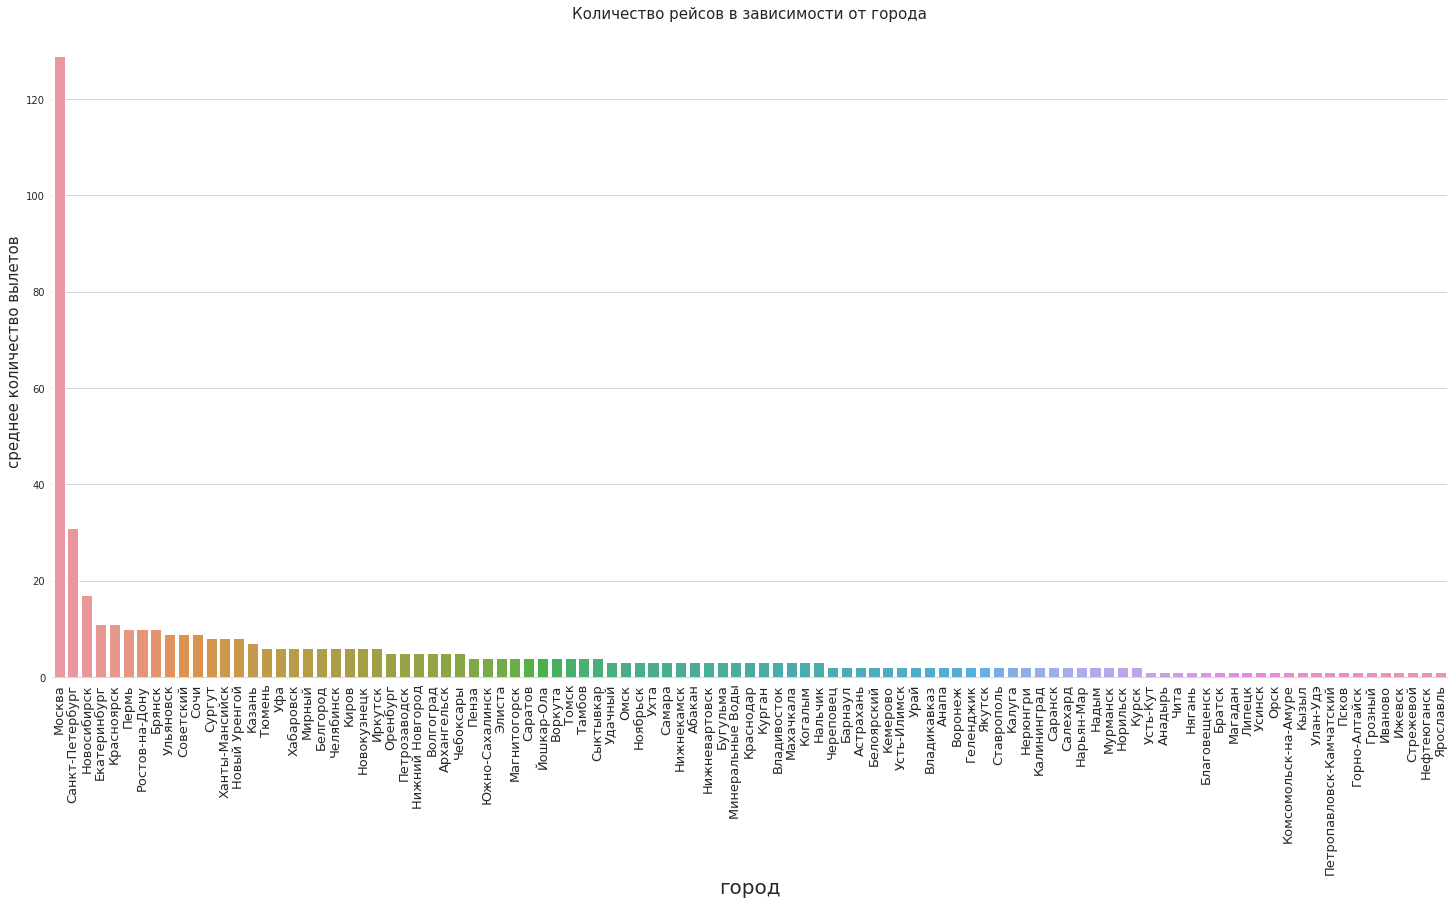

In [13]:
sns.set_style("whitegrid")
plt.figure(figsize=(25, 12))
plt.title('Количество рейсов в зависимости от города', fontsize=15)
sns.barplot(y='average_flights', x='city', data=bar2)
sns.despine(left=True)
plt.xlabel('город', fontsize=20)
plt.ylabel('среднее количество вылетов', fontsize=15)
plt.xticks(fontsize = 13, rotation=90)
plt.show()

Ничего неожиданного: в топе - столицы + главные хабы авиакомпаний, такие как Новосибирск и Екатеринбург (S7 и Ural airlines соответственно)

**5. Посмотрим на топ-10 городов по количеству вылетов:**

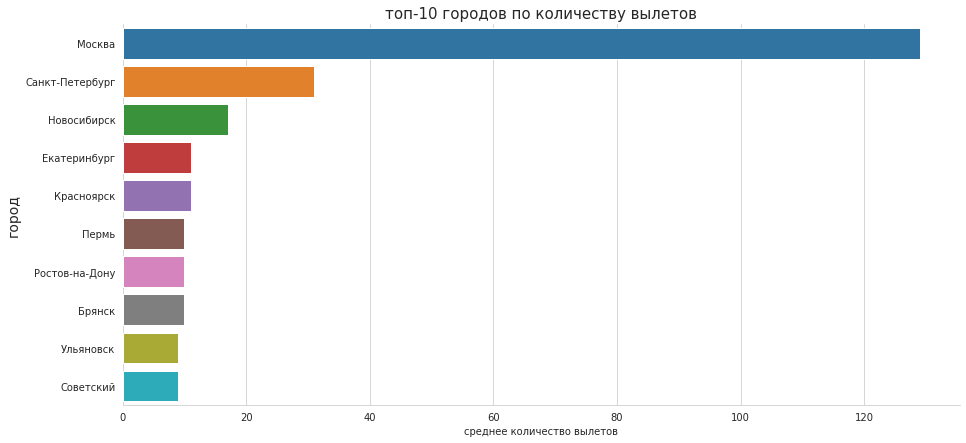

In [14]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 7))
plt.title('топ-10 городов по количеству вылетов', fontsize=15)
sns.barplot(y='city', x='average_flights', data=top10.sort_values(by='average_flights', ascending=False))
sns.despine(left=True)
plt.xlabel('среднее количество вылетов')
plt.ylabel('город', fontsize=14)
plt.show()

**6. Проверка гипотезы о влиянии проводимых фестевалей на средний спрос на авиабилеты:**

Посмотрим на наш датафрейм более подробно:

In [15]:
query_last

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


Очевидно, надо сделать 2 среза: с фестивалями и без.

In [16]:
query_last['festival_name'] = query_last['festival_name'].fillna('none')
no_fest = query_last.query('festival_name == "none"')
no_fest

,week_number,ticket_amount,festival_week,festival_name
2,32,51675,NaN,none
3,33,51378,NaN,none
4,34,51492,NaN,none
5,35,51360,NaN,none
7,37,51670,NaN,none
8,38,51518,NaN,none
9,39,51623,NaN,none


In [17]:
fest = query_last.query('festival_name != "none"')
fest

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
6,36,51386,36.0,Видфест


**6.1 Cформулируем гипотезы:**

**Н0:** Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время

**H1:** Средний спрос на билеты во время фестивалей отличается от среднего спросу на билеты в обычное время

Используем метод **scipy.stats.ttest_ind:**

In [18]:
ticket_festival = fest['ticket_amount']
ticket_no_festival = no_fest['ticket_amount']

alpha = 0.05 

results = st.ttest_ind(
    ticket_festival, 
    ticket_no_festival)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем Н0")
else:
    print("Не отвергаем Н0")

p-value: 0.09688869045922928
Не отвергаем Н0


**7. Вывод:**

1. Самыми используемыми моделями самолета  являются Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100;

2. Лидеры по количеству полетов: Москва, Санкт-Петербург, Екатеринбург и Новосибирск

3. В дни фестивалей средний спрос на авиабилеты не отличается от спроса на авиабилеты в те дни, когда фестивали не проводятся.